In [31]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

from os.path import join

In [32]:
DATA_ROOT = '轉經緯度後資料'

In [33]:
raw_df = pd.read_csv(join(DATA_ROOT, 'bicycle_coord.csv'), engine='python', encoding='big5', sep='\t')

In [34]:
# raw_df = pd.read_csv(join(DATA_ROOT, 'home_theft_coord.csv'), engine='python', encoding='big5', sep='\t')

In [35]:
raw_df

,id,案類,發生日期,發生時段,Address,Response_Address,Response_X,Response_Y
0,1,自行車竊盜,1040101,16~18,臺北市大安區住安里四維路124巷1~30號,臺北市大安區住安里17鄰四維路124巷30號,121.547079,25.031682
1,2,自行車竊盜,1040104,08~10,臺北市大安區敦煌里仁愛路4段266巷1~30號,臺北市大安區敦煌里17鄰仁愛路四段266巷12號,121.552831,25.036850
2,3,自行車竊盜,1040106,14~16,臺北市萬華區國興路1~30號,臺北市萬華區新和里29鄰國興路104號,121.505405,25.027434
3,4,自行車竊盜,1040108,08~10,臺北市北投區清江里三合街2段481~510號,臺北市北投區清江里24鄰三合街二段489號,121.500981,25.126138
4,5,自行車竊盜,1040108,16~18,臺北市松山區延壽街391~420號,臺北市松山區龍田里10鄰延壽街440號,121.555758,25.056145
...,...,...,...,...,...,...,...,...
2407,2408,自行車竊盜,1101026,16~00,臺北市文山區樟文里016鄰辛亥路7段84巷1~30號,臺北市文山區樟文里14鄰辛亥路七段84巷30號,121.555145,24.981342
2408,2409,自行車竊盜,1101003,11~13,臺北市北投區開明里復興四路18巷1~30號,臺北市北投區開明里1鄰復興四路18巷12號,121.500221,25.141631
2409,2410,自行車竊盜,1100924,20~22,臺北市松山區延壽街424巷,臺北市松山區龍田里10鄰延壽街422號,121.556445,25.056222
2410,2411,自行車竊盜,1101029,14~16,臺北市大同區承德路與民權西路天橋下,臺北市大同區建明里19鄰承德路一段1號,121.516784,25.049090


In [36]:
df = raw_df[['Response_Address', 'Response_X', 'Response_Y']]

In [37]:
df.shape

(2412, 3)

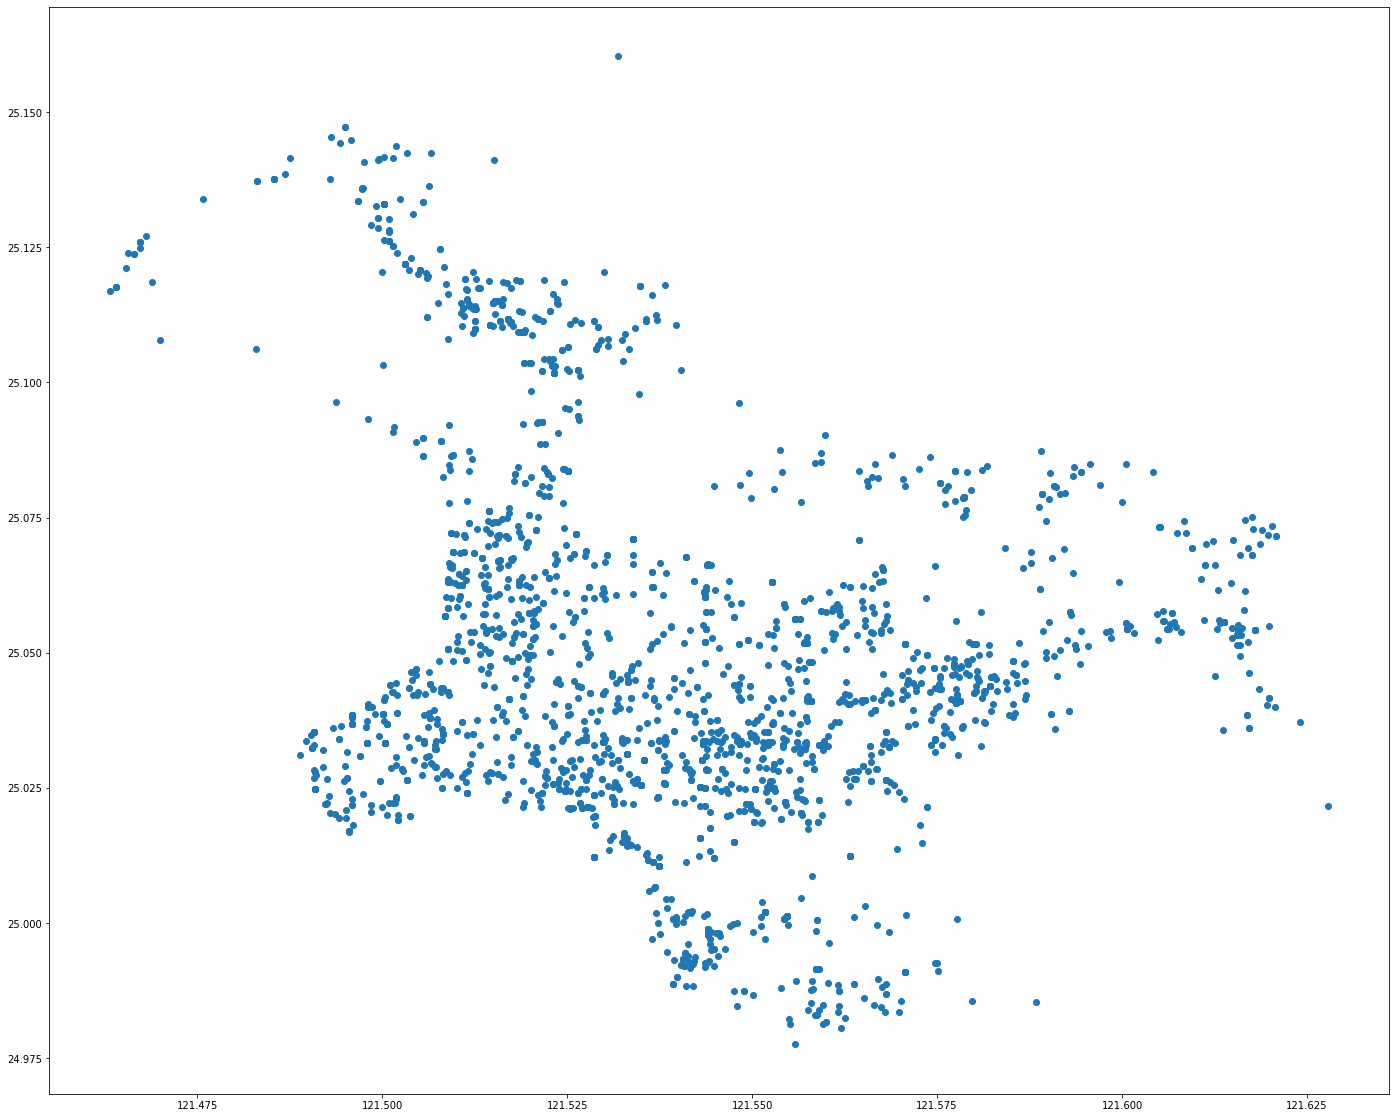

In [38]:
plt.figure(figsize=(24, 20))
plt.scatter(df['Response_X'], df['Response_Y'])

In [125]:
def merge_district(theft_name, district_name, target_name, COORD_ROOT='轉經緯度後資料', DISTRICT_ROOT='clean_data', MERGE_ROOT='merge'):
    if COORD_ROOT=='轉經緯度後資料':
        theft_df = pd.read_csv(join(COORD_ROOT, theft_name), engine='python', encoding='big5', sep='\t')
    else:
        theft_df = pd.read_csv(join(COORD_ROOT, theft_name), engine='python')
    df = theft_df.rename(columns={'Response_Address': 'address', 'Response_X': 'lng', 'Response_Y': 'lat', })
    df = df[['address', 'lat', 'lng']]
    df['district'] = df['address'].str.split('市').str[1].str.split('區').str[0] + '區'
    df = df.dropna()
    
    district_df = pd.read_excel(join(DISTRICT_ROOT, district_name), sheet_name='工作表1')
    if 'district' not in district_df.columns:
        district_df = district_df.rename(columns={'市轄區': 'district'})
        
    merge_df = pd.merge(df, district_df, how='left', on='district')
    merge_df.to_csv(join(MERGE_ROOT, target_name), index=False)
    

In [118]:
merge_district('bicycle_coord.csv', '分區資料.xlsx', 'bicycle_district.csv')


In [120]:
for name in ['car', 'home', 'motor']:
    merge_district(f'{name}_theft_coord.csv', '分區資料.xlsx', f'{name}_district.csv')

In [126]:
merge_district('non_bicycle_coord.csv', '分區資料.xlsx', 'non_bicycle_district.csv', COORD_ROOT='zero_data')

In [127]:
for name in ['car', 'home', 'motor']:
    merge_district(f'non_{name}_theft_coord.csv', '分區資料.xlsx', f'non_{name}_district.csv', COORD_ROOT='zero_data')

In [155]:
d = pd.read_csv('clean_data/school.csv')


In [156]:
d

,id,school name,Address,Response_Address,Response_X,Response_Y
0,1,國立政治大學,臺北市文山區指南路二段64號,臺北市文山區萬興里9鄰指南路二段64號,121.576504,24.987418
1,2,國立臺灣大學,臺北市大安區羅斯福路四段1號,臺北市大安區學府里17鄰羅斯福路四段1號,121.533700,25.016981
2,3,國立臺灣師範大學,臺北市大安區和平東路一段162號,臺北市大安區古莊里2鄰和平東路一段162號,121.527570,25.026454
3,4,國立臺北大學,新北市三峽區大學路151號,新北市三峽區龍恩里23鄰大學路151號,121.373159,24.945134
4,5,國立臺灣科技大學,臺北市大安區基隆路四段43號,臺北市大安區學府里5鄰基隆路四段43號,121.540623,25.013743
...,...,...,...,...,...,...
2549,2550,市立陽明高中附設國中,臺北市士林區後港里中正路510號,臺北市士林區後港里4鄰中正路510號,121.517206,25.091850
2550,2551,市立百齡高中附設國中,臺北市士林區義信里承德路4段177號,臺北市士林區義信里12鄰承德路四段177號,121.523099,25.086957
2551,2552,私立薇閣高中附設國中,臺北市北投區中心里珠海路50號,臺北市北投區中心里11鄰珠海路50號,121.504569,25.139958
2552,2553,臺北市幼華高中附設國中,臺北市北投區北投路二段55號,臺北市北投區大同里11鄰北投路二段55號,121.496722,25.133621


In [157]:
d = d.rename(columns={'Response_X': 'lng', 'Response_Y': 'lat'})
d = d.dropna()
d.to_csv('clean_data/school.csv', index=False)

In [170]:
d=pd.read_csv('merge/home_district.csv')

In [171]:
d

,address,lat,lng,district,publand,robbery,urban_proj,monitor,idle
0,臺北市文山區萬美里24鄰萬寧街129號,25.003557,121.569674,文山區,15745617.73,1,3150.900000,1350,943.56
1,臺北市信義區富臺里6鄰忠孝東路五段295巷6弄6號,25.041779,121.572792,信義區,5953425.42,1,1120.770000,1012,282.60
2,臺北市中山區正義里17鄰新生北路一段172號,25.051848,121.527454,中山區,7723327.91,4,1368.209961,1440,1361.68
3,臺北市文山區明興里10鄰興隆路四段89號,24.988952,121.560239,文山區,15745617.73,1,3150.900000,1350,943.56
4,臺北市士林區天福里8鄰忠誠路二段130巷34號,25.114723,121.530790,士林區,28233710.05,2,6236.820000,1480,457.06
...,...,...,...,...,...,...,...,...,...
3204,臺北市中山區新庄里13鄰吉林路490號,25.068131,121.530327,中山區,7723327.91,4,1368.209961,1440,1361.68
3205,臺北市內湖區港墘里4鄰江南街21巷11號,25.078291,121.579230,內湖區,11254761.59,1,3157.870000,1370,0.00
3206,臺北市大同區保安里14鄰哈密街45巷1弄33號,25.074095,121.518465,大同區,2253601.36,6,568.150000,868,0.00
3207,臺北市文山區興家里11鄰興隆路三段207巷12弄12號,24.994368,121.561183,文山區,15745617.73,1,3150.900000,1350,943.56


In [162]:
import plotly.express as px
c = pd.read_csv('merge/non_home_district.csv')

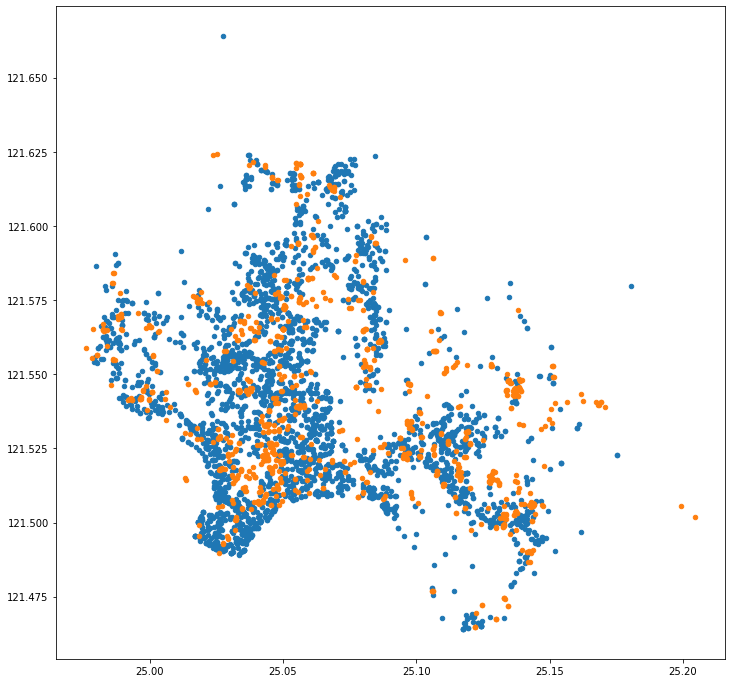

In [167]:
fig = plt.subplots(figsize=(12, 12))
plt.scatter(d['lat'], d['lng'], s=20)
plt.scatter(c['lat'], c['lng'], s=20)

In [188]:
d['status'] = 'theft'
c['status'] = 'safe'
dc = pd.concat([d, c])

In [184]:
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'notebook' or 'colab' or 'jupyterlab'

In [206]:
fig = px.scatter_mapbox(dc, lat="lat", lon="lng", hover_name="address", zoom=10, height=500, color='status')
# px.scatter_mapbox(c, lat="lat", lon="lng", hover_name="address", zoom=30, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_geos(
    showsubunits=True, subunitcolor="Black"
)
# fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [176]:
plt.savefig('a.png')

<Figure size 432x288 with 0 Axes>

In [201]:
geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.6363215300962, 45.5759177646435],
       [-73.6362833815582, 45.5758266113331],
       [-73.6446417578686, 45.5658132919643],
       [-73.6453511352974, 45.5647725775888],
       [-73.648867564748, 45.5586898267402],
       [-73.6513170845065, 45.5545659435652],
       [-73.6515658357324, 45.5554439857955],
       [-73.6660837831645, 45.5596724837829],
       [-73.6706609041685, 45.5610978251999],
       [-73.6676019919116, 45.5632340862888],
       [-73.6645385824068, 45.5642716484367],
       [-73.663663123697, 45.5654269638586],
       [-73.663336397858, 45.5666288247853],
       [-73.6637764768649, 45.5678900619231],
       [-73.6625073244826, 45.5688479494114],
       [-73.6624620526633, 45.5708304456346],
       [-73.6620201425015, 45.5713925326191],
       [-73.6616100197742, 45.5737924780218],
       [-73.6612199500215, 45.5747171555678],
       [-7